<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [78]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [156]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import datetime as dt
from sklearn.tree import DecisionTreeRegressor



from sklearn.linear_model import LinearRegression, Lasso, Ridge
sns.set(rc={'figure.figsize':(16,8.27)})

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [80]:
dataProcessed = pd.read_csv('indexProcessed.csv')
dataProcessed.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [81]:
dataInfo = pd.read_csv("indexInfo.csv")
dataInfo.head()

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY


In [82]:
data = pd.merge(dataProcessed, dataInfo, on='Index')
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,Hong Kong,Hong Kong Stock Exchange,HKD


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
 9   Region     104224 non-null  object 
 10  Exchange   104224 non-null  object 
 11  Currency   104224 non-null  object 
dtypes: float64(7), object(5)
memory usage: 9.5+ MB


In [84]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [85]:
data.fillna(method='ffill', inplace=True);
data.isnull().sum()

/var/folders/0k/srjv8gcd6rg27wr8s8j543k00000gn/T/ipykernel_9049/2519467061.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True);


Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
Region       0
Exchange     0
Currency     0
dtype: int64

In [86]:
copy = pd.DataFrame(data)
copy.drop(['Index'], axis=1, inplace=True)
copy.drop(['Date'], axis=1, inplace=True)
copy.drop(['Region'], axis=1, inplace=True)
copy.drop(['Exchange'], axis=1, inplace=True)
copy.drop(['Currency'], axis=1, inplace=True)
copy.head()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [87]:
copy.corr()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Open,1.000000,0.999958,0.999942,0.999904,0.999904,0.129090,0.187904
High,0.999958,1.000000,0.999929,0.999954,0.999954,0.128926,0.187606
Low,0.999942,0.999929,1.000000,0.999958,0.999958,0.128964,0.188190
Close,0.999904,0.999954,0.999958,1.000000,1.000000,0.128971,0.187979
Adj Close,0.999904,0.999954,0.999958,1.000000,1.000000,0.128976,0.187980
Volume,0.129090,0.128926,0.128964,0.128971,0.128976,1.000000,0.506375
CloseUSD,0.187904,0.187606,0.188190,0.187979,0.187980,0.506375,1.000000


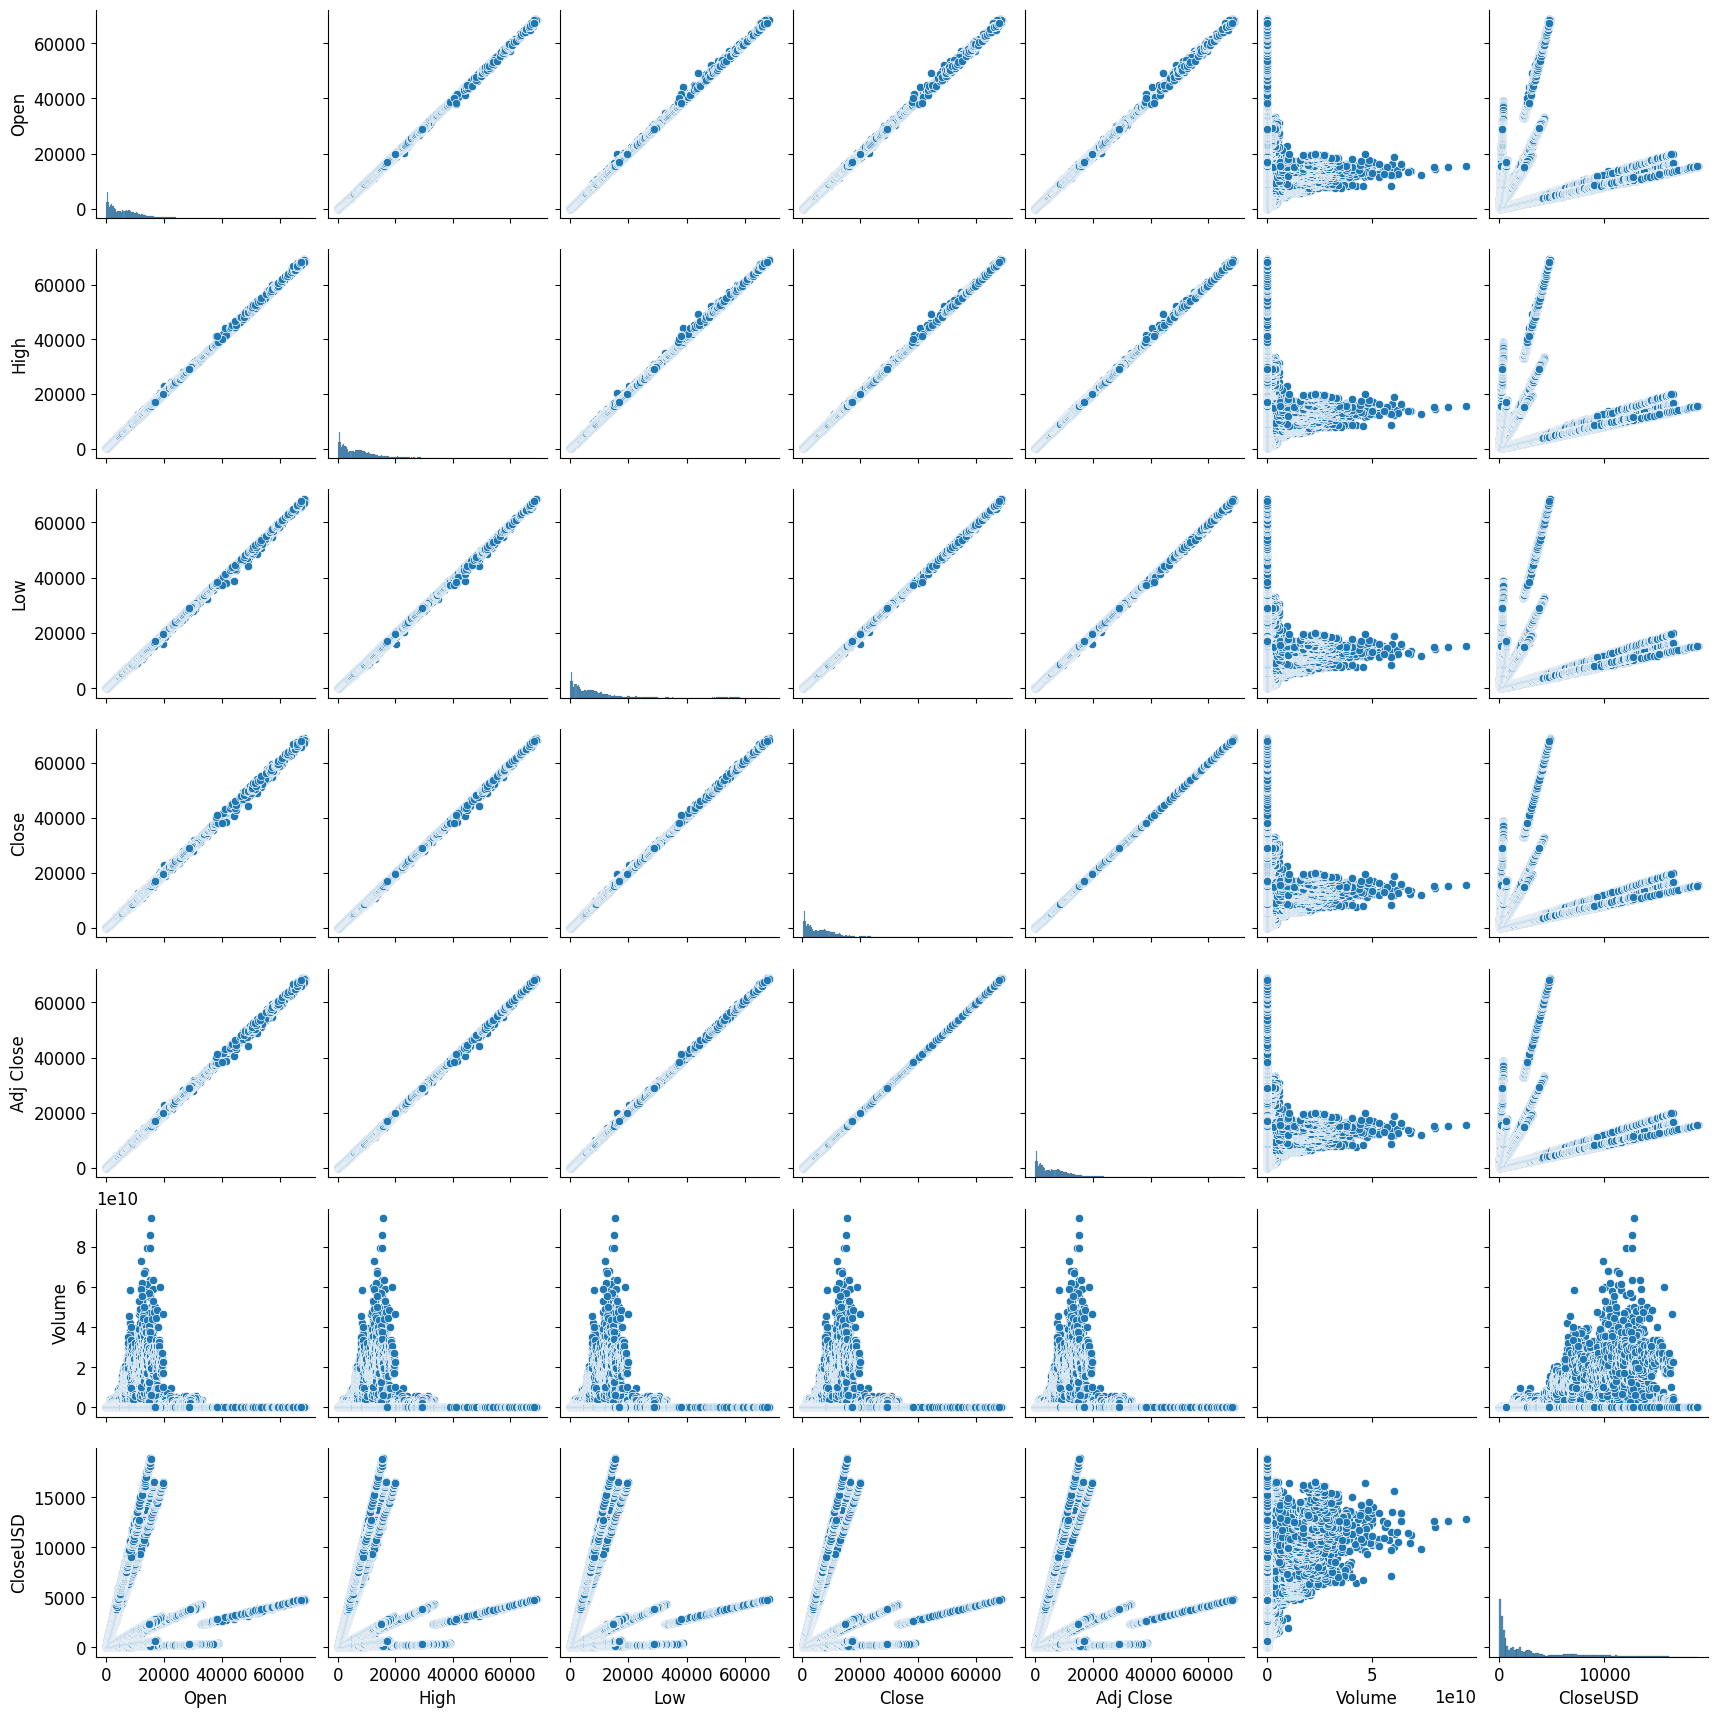

In [88]:
sns.pairplot(data)

In [131]:
data['Date'] = pd.to_datetime(data['Date']) 

In [132]:
data_NYA = data[data["Index"].isin(["NYA"])].sort_values(by='Date')

In [133]:
data_NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,528.690002,United States,New York Stock Exchange,USD
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,527.210022,United States,New York Stock Exchange,USD
8494,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,527.840027,United States,New York Stock Exchange,USD
8495,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00,531.119995,United States,New York Stock Exchange,USD
8496,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00,532.070007,United States,New York Stock Exchange,USD
...,...,...,...,...,...,...,...,...,...,...,...,...
22434,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09,16464.689450,United States,New York Stock Exchange,USD
22435,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09,16390.189450,United States,New York Stock Exchange,USD
22436,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09,16451.960940,United States,New York Stock Exchange,USD
22437,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09,16531.949220,United States,New York Stock Exchange,USD


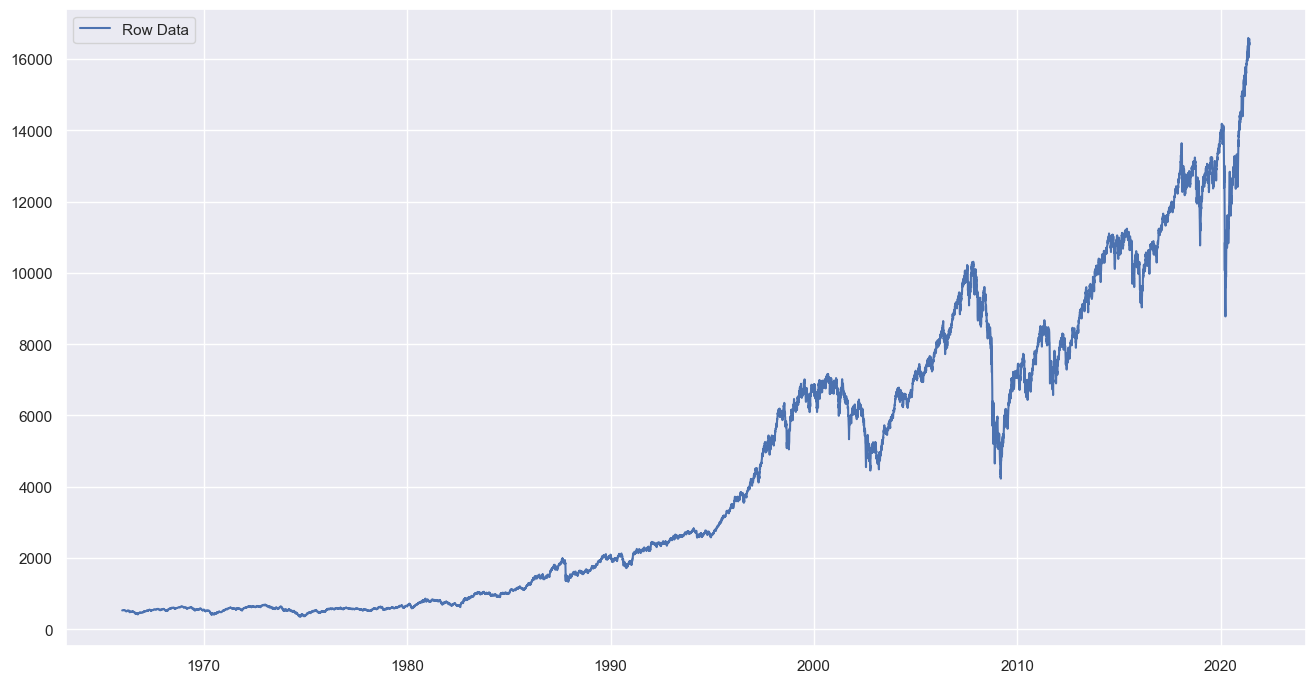

In [138]:
plt.plot(data_NYA["Date"],data_NYA["Close"],label='Row Data')
plt.legend()

<Axes: >

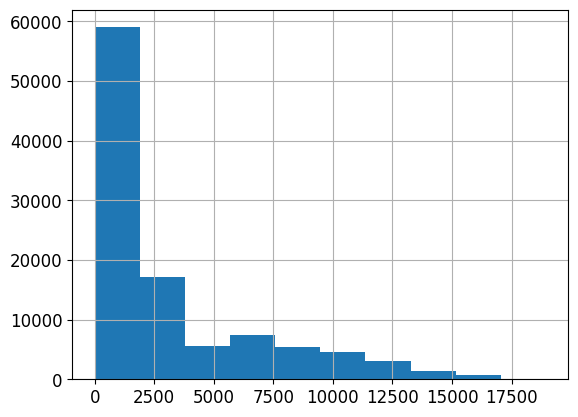

In [116]:
data.CloseUSD.hist()

In [118]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 
normaltest(data.CloseUSD.values)

NormaltestResult(statistic=23830.044123977954, pvalue=0.0)

# 2. Objectives


In [89]:
# The objective is to guess stock prices based on the 7 attrubitues provided in the dataset. 
# The attributes are as follows:
#        Open
#        High
#        Low
#        Close
#        Adj Close
#        Volume
#        Market Cap


# 3. Linear Regression Models


<Axes: >

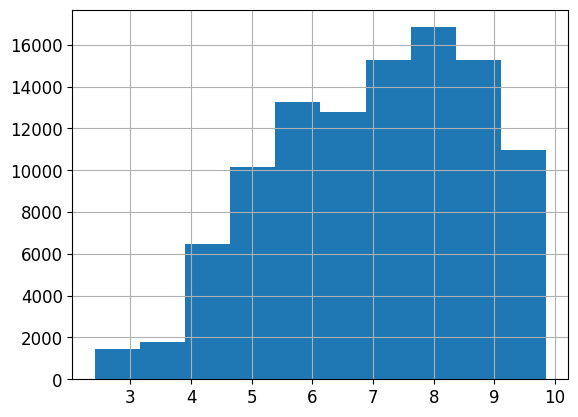

In [129]:
log_data = np.log1p(copy.CloseUSD)
log_data.hist()

In [130]:
normaltest(log_data)

NormaltestResult(statistic=8907.686254511744, pvalue=0.0)

In [90]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    copy.drop(['CloseUSD'], axis=1),
    copy.CloseUSD,
    test_size= 0.6,  # 20% test data & 80% train data
    random_state=0
)

#splitting data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_train1,
    y_train1,
    test_size= 0.6,  # 20% test data & 80% train data
    random_state=0
)

Coefficients: 
 [ 2.12754327e-01 -2.05967152e+00  1.22796492e+00  2.63333303e+01
 -2.56435774e+01  4.19919797e-07]
Mean squared error: 10230964.73
Coefficient of determination: 0.28


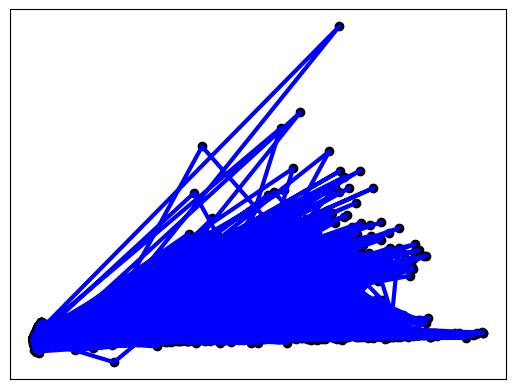

In [91]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.52317e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.53047e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


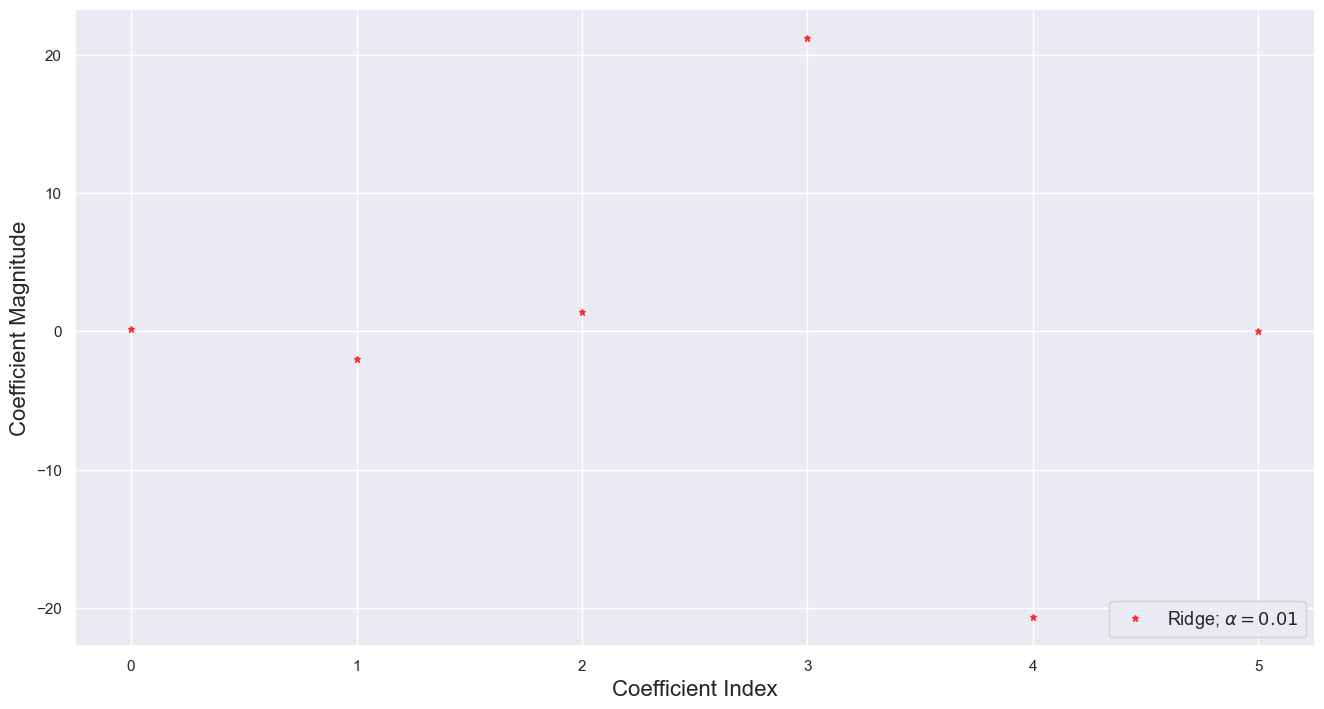

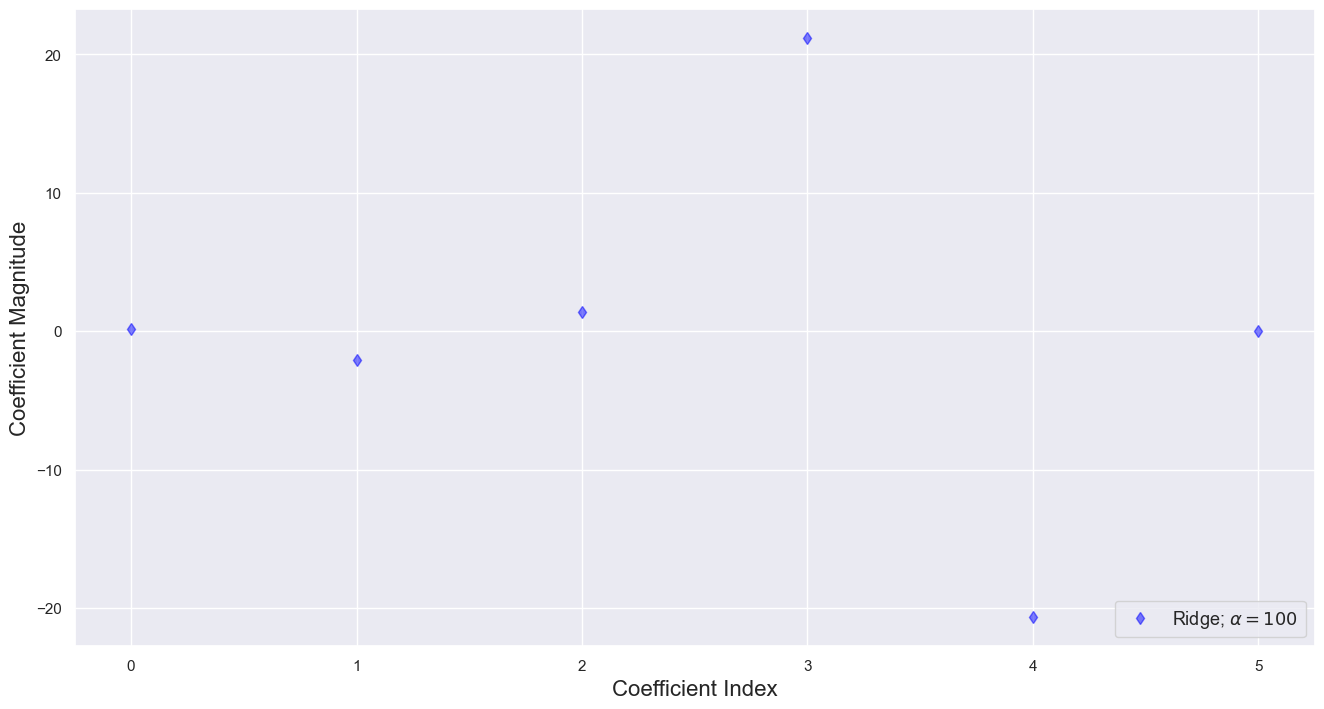

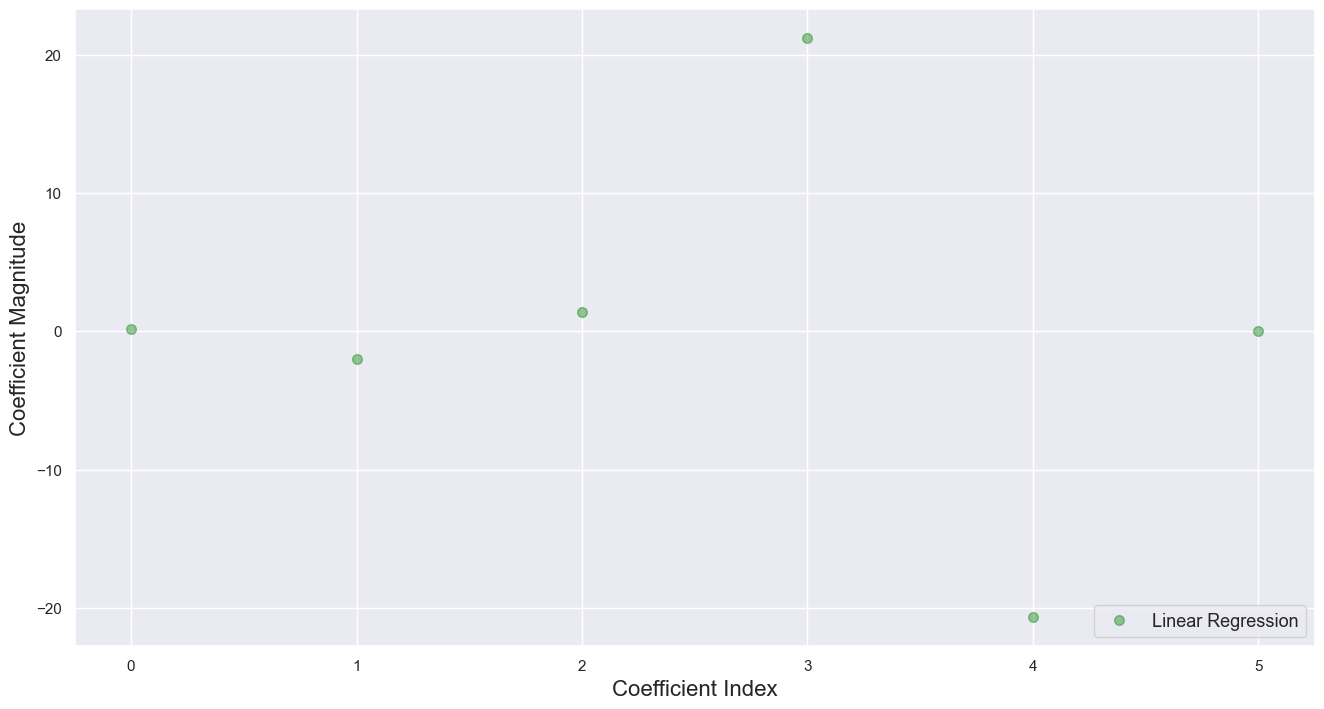

In [139]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression()
lr.fit(X_train, y_train)
stock_predict = lr.predict(X_test)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

plt1.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt1.xlabel('Coefficient Index',fontsize=16)
plt1.ylabel('Coefficient Magnitude',fontsize=16)
plt1.legend(fontsize=13,loc=4)
plt1.show()

plt1.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt1.xlabel('Coefficient Index',fontsize=16)
plt1.ylabel('Coefficient Magnitude',fontsize=16)
plt1.legend(fontsize=13,loc=4)
plt1.show()

plt2.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt2.xlabel('Coefficient Index',fontsize=16)
plt2.ylabel('Coefficient Magnitude',fontsize=16)
plt2.legend(fontsize=13,loc=4)
plt2.show()


In [99]:
X = copy.drop("CloseUSD",axis = 1)
Y = copy.CloseUSD

In [100]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [101]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  2  4  5  6  9 10 11 12 13] 69482
Test index: [ 1  3  7  8 17 21 22 23 26 28] 34742

Train index: [ 0  1  2  3  4  7  8 10 11 12] 69483
Test index: [ 5  6  9 13 14 15 16 19 20 24] 34741

Train index: [ 1  3  5  6  7  8  9 13 14 15] 69483
Test index: [ 0  2  4 10 11 12 18 29 33 34] 34741



In [102]:
#from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        Y[train_index], 
                                        Y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.2720111467938223, 0.2810577993342981, 0.26881214961391553]

In [142]:
data_data_close = data_NYA[["Date","Close"]]
data_trainlr = data_data_close
data_testlr = data_data_close

In [146]:
 data_trainlr.Date = data_trainlr.Date.map(dt.datetime.toordinal)

/var/folders/0k/srjv8gcd6rg27wr8s8j543k00000gn/T/ipykernel_9049/3494511156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trainlr.Date = data_trainlr.Date.map(dt.datetime.toordinal)


In [149]:
X_trainLR = np.array(data_trainlr.Date)[:, np.newaxis]
y_trainLR = data_trainlr.Close

In [152]:
DTree = DecisionTreeRegressor(criterion='squared_error', max_depth=50).fit(X_trainLR, y_trainLR)

In [153]:
linearReg = LinearRegression().fit(X_trainLR, y_trainLR)

In [154]:
X_all = np.array(data_NYA.Date.map(dt.datetime.toordinal))[:, np.newaxis]


In [158]:
pred_tree = DTree.predict(X_all)
pred_lr = linearReg.predict(X_all)
X = np.array(data_trainlr.Date)
y = np.array(data_trainlr.Close)
model_coef_polyfit = poly.polyfit(X, y, 3)
X_new = np.array(data_NYA.Date.map(dt.datetime.toordinal))
ffit = poly.polyval(X_new, model_coef_polyfit)
X_new = pd.DataFrame(X_new,columns=['Date'])
X_new = X_new.Date.map(dt.datetime.fromordinal)

In [ ]:
plt.plot(data_NYA.Date,data_NYA.Close,label='Row Data')
plt.plot(data_NYA.Date,pred_tree,label='Decision Tree')
plt.plot(data_NYA.Date,pred_lr,label='Linear Regression')
plt.plot(X_new,ffit,label='Fit using polyfit')
plt.legend()

# 4. Insights and key findings


# 5. Next Steps


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
